Read & Download the dataset first ---> https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snc

In [3]:
air_quality = pd.read_csv("C:/Users/VIVEK/MultiVariate Time Series Forecasting/AirQualityUCI.csv", sep=";", decimal=",")

#### We will use the AirQualityUCI.csv file as our dataset which is downloaded from UCI.
#### It is a ';' seperated file so we'll specify it as a parameter for the read_csv function.

In [4]:
air_quality.dropna(axis=0, how= 'all', inplace=True)
air_quality.dropna(axis=1, inplace=True)

#### We are dropping rows and columns containing all the null values as the dataset contains Null values.

In [5]:
air_quality.replace(to_replace= -200, value= np.NaN, inplace= True)
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


#### All the missing values in the dataset are represented by the values -200. So we can replace those values by NULL Values using np.NAN

In [6]:
air_quality.fillna(air_quality.mean(), inplace= True)

##### To replace these NULL Values we are using mean value of the row.

<AxesSubplot:>

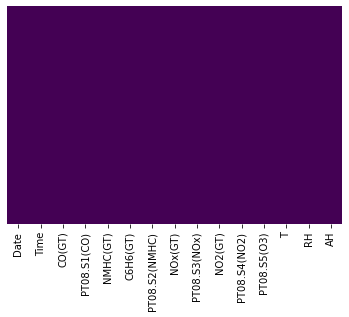

In [7]:
snc.heatmap(air_quality.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
air_quality.loc[:,'Date']=air_quality['Date']
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


#### For "Date", converting string values to datetime data type, and storing them in list "Date".

In [9]:
from datetime import datetime
Date= []
for i in air_quality['Date']:
    Date.append(datetime.strptime(i,'%d/%m/%Y'))
air_quality.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

#### Converting Date list to Series, and using it as the index of data

In [10]:
date=pd.Series(Date)
air_quality['Date']=pd.to_numeric(date)

#### Printing all the features with all the DataTypes.

In [11]:
air_quality['Date']=air_quality['Date'].astype(float)
#air_quality.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [12]:
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.078877e+18,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1.078877e+18,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1.078877e+18,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1.078877e+18,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.078877e+18,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [13]:
air_quality.loc[:,'Time']=air_quality['Time']

#### For "Time", converting string values to datetime data type, and storing them in list "Time"

In [14]:
from datetime import datetime
Time= []
for i in air_quality['Time']:
    Time.append(datetime.strptime(i,'%H.%M.%S'))
air_quality.dtypes

Date             float64
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

#### Converting Time list to series, and use it as the index of data

In [15]:
time=pd.Series(Time)
air_quality['Time']=pd.to_numeric(time)

#### Printing the datatypes of all the features.

In [16]:
air_quality['Time']=air_quality['Time'].astype(float)
air_quality.dtypes

Date             float64
Time             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [17]:
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.078877e+18,-2.208924e+18,2.6,1360.0,150.000000,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1.078877e+18,-2.208920e+18,2.0,1292.0,112.000000,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,1.078877e+18,-2.208917e+18,2.2,1402.0,88.000000,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,1.078877e+18,-2.208913e+18,2.2,1376.0,80.000000,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.078877e+18,-2.208910e+18,1.6,1272.0,51.000000,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1.112573e+18,-2.208953e+18,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,1.112573e+18,-2.208949e+18,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,1.112573e+18,-2.208946e+18,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,1.112573e+18,-2.208942e+18,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


## Importing MinMaxScaler from Sklearn to standardize our dataset.

In [18]:
from sklearn.preprocessing import MinMaxScaler

#### Here feature scaling is done for the transformation of raw data into a standardized dataset so that they fall in a specific range of values. MinMaxScaler is used here for the transformation of the data in the range between 0 and 1. 

In [19]:
num = air_quality.keys()
scaler = MinMaxScaler()
scaler.fit(air_quality[num])
air_quality[num] = scaler.transform(air_quality[num])

In [20]:
air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.0,0.782609,0.211864,0.511845,0.120981,0.185535,0.362097,0.111036,0.310885,0.328402,0.513040,0.454822,0.333333,0.499371,0.280066
1,0.0,0.826087,0.161017,0.463029,0.088832,0.146226,0.312398,0.068382,0.360864,0.266272,0.453237,0.326238,0.326882,0.484277,0.264282
2,0.0,0.869565,0.177966,0.541996,0.068528,0.139937,0.303659,0.087339,0.346463,0.331361,0.451439,0.370547,0.296774,0.563522,0.276352
3,0.0,0.913043,0.177966,0.523331,0.061760,0.143082,0.308575,0.115098,0.326133,0.355030,0.464478,0.426586,0.277419,0.638994,0.294190
4,0.0,0.956522,0.127119,0.448672,0.037225,0.100629,0.247406,0.087339,0.373994,0.337278,0.422212,0.386186,0.281720,0.633962,0.295216


#### Visualizing the dataset using pair plots to determine whether the data is linear. 

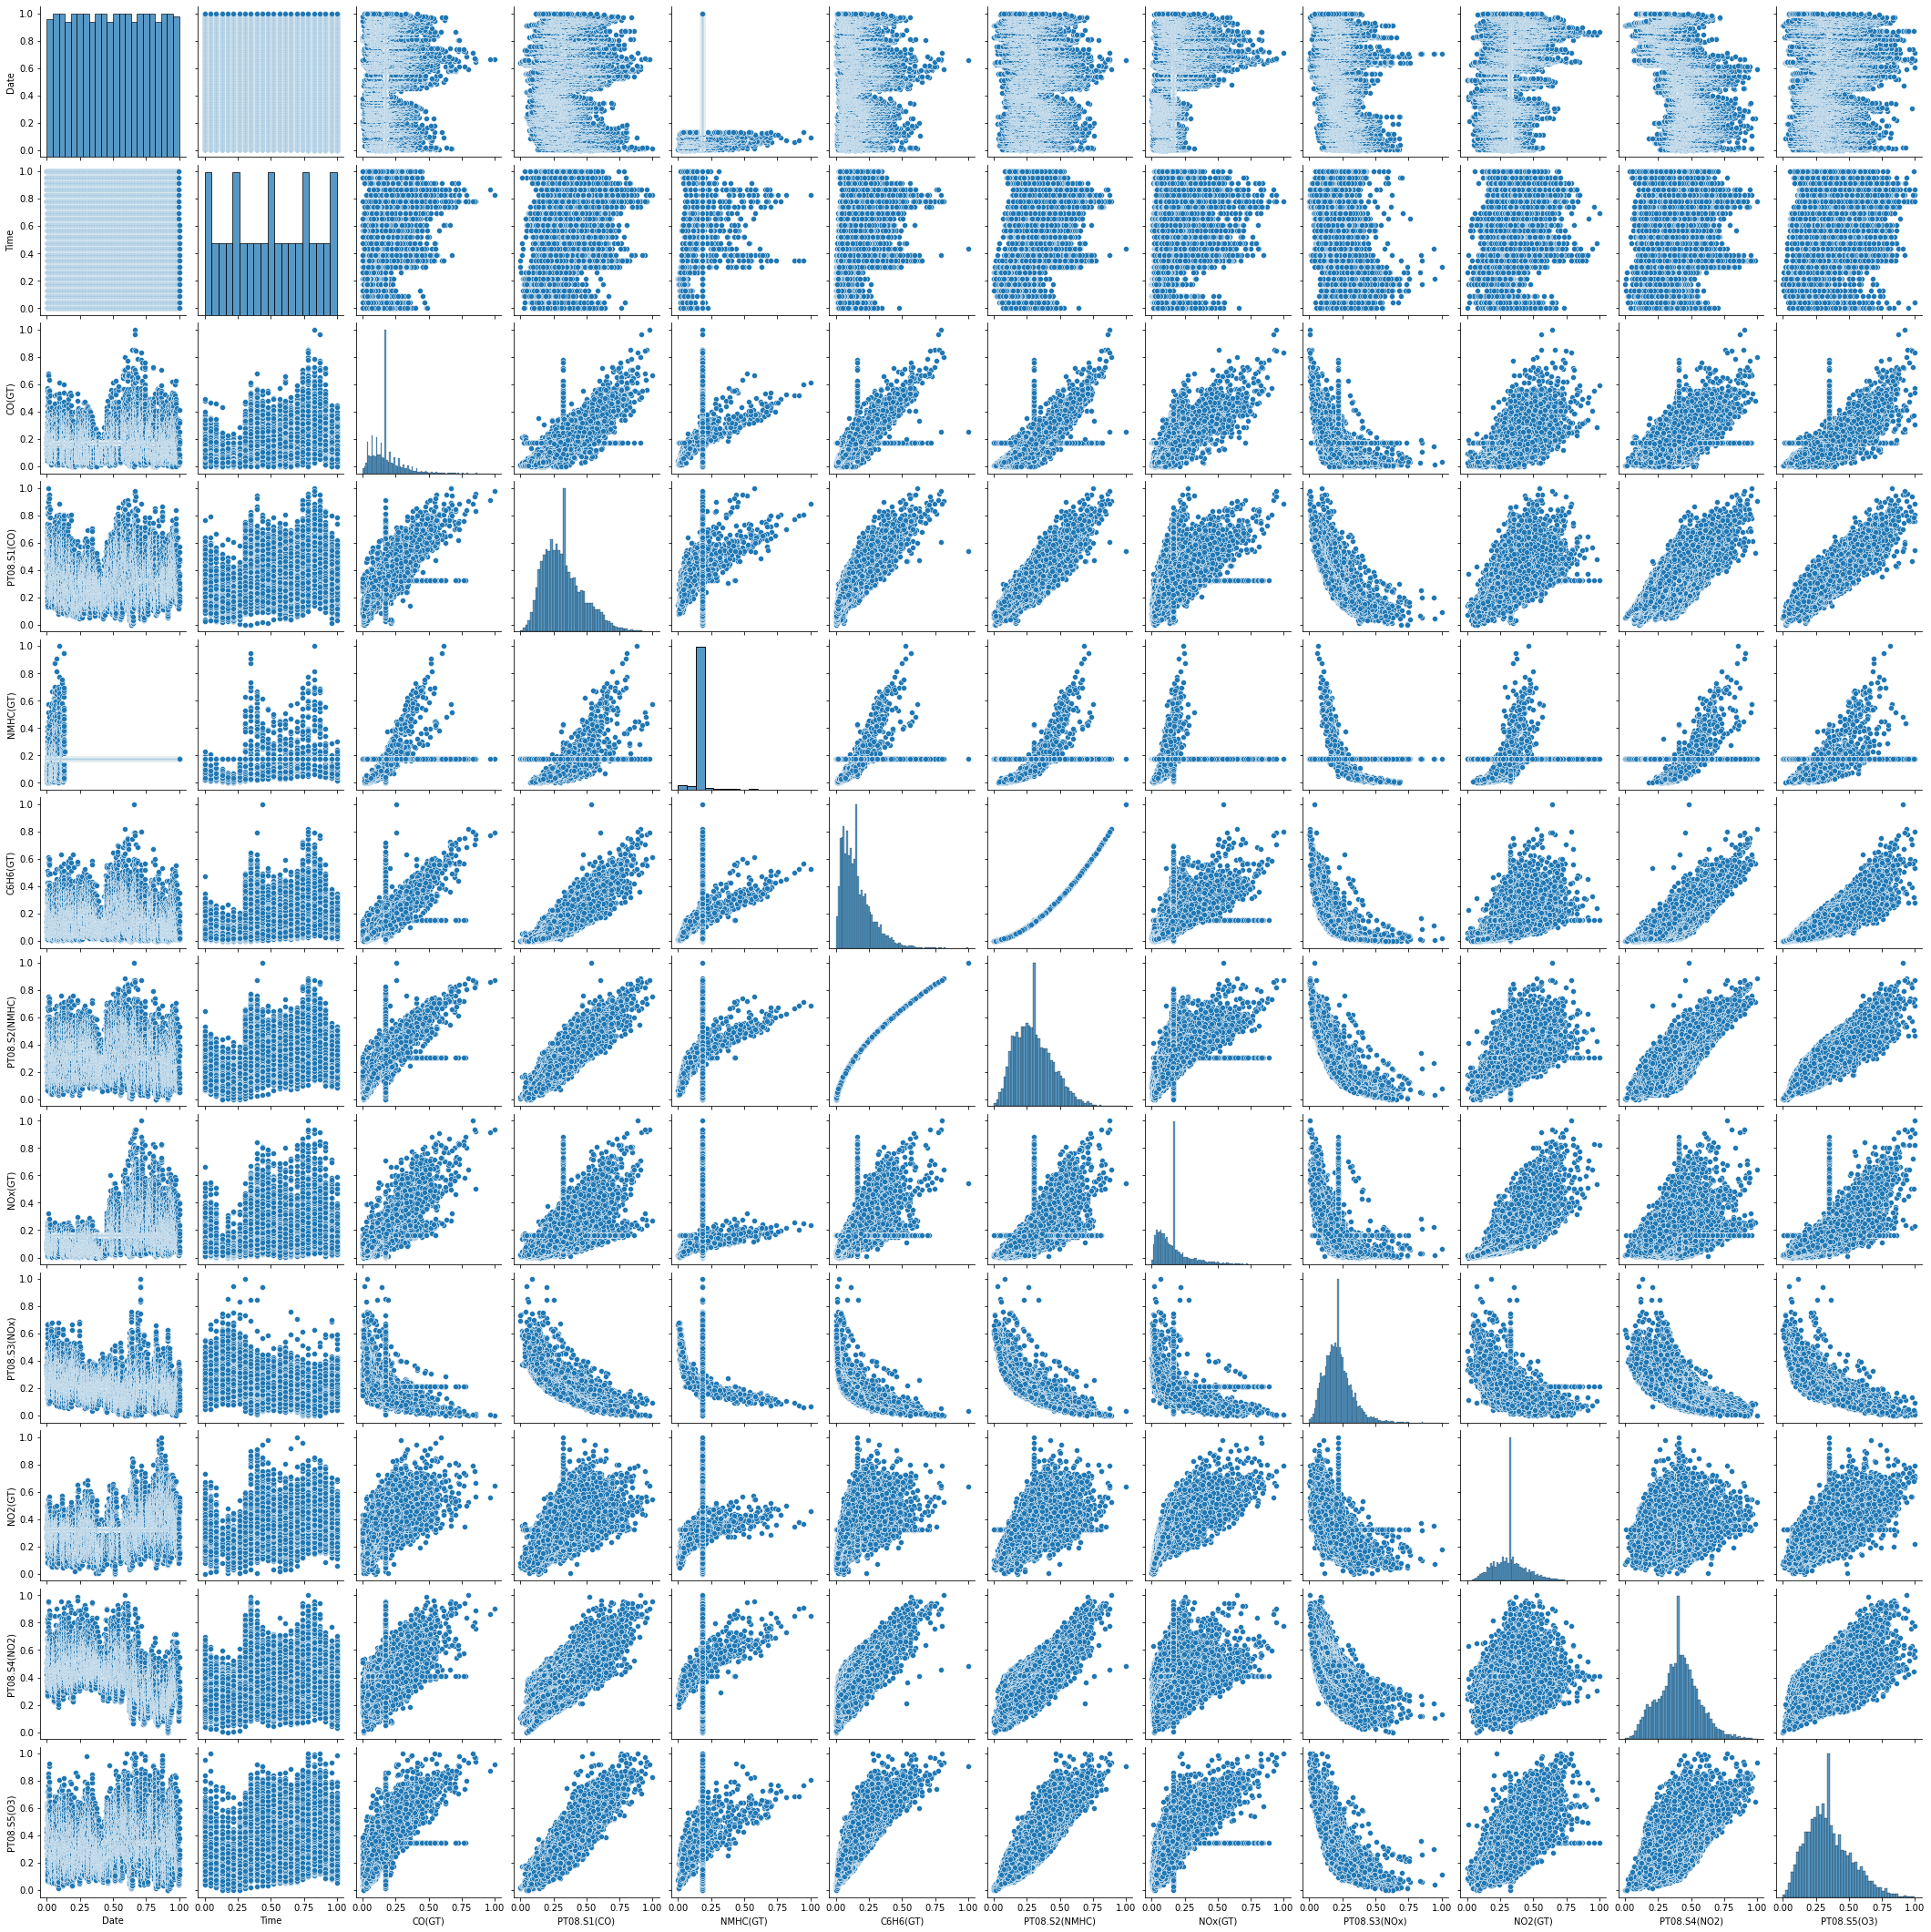

In [21]:
snc.pairplot(air_quality[["Date","Time","CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)","PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)"]],diag_kind = "auto")

In [22]:
features=air_quality

In [23]:
features=features.drop('C6H6(GT)',axis=1)

#### Computing the features.

In [24]:
target=air_quality['C6H6(GT)']

#### Computing the target by selecting the target as C6H6(GT) because C6H6(GT) is the main pollutant causing air pollution.

In [25]:
air_quality2=air_quality.corr('pearson')
air_quality2

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,1.000000,-0.003249,0.041514,-0.003232,0.008010,-0.064007,-0.083633,0.401280,-0.251775,0.349315,-0.517637,0.103508,-0.450032,0.212245,-0.310146
Time,-0.003249,1.000000,0.323944,0.321097,0.102758,0.336890,0.380964,0.200493,-0.316828,0.327673,0.216572,0.239880,0.202272,-0.289543,-0.018233
CO(GT),0.041514,0.323944,1.000000,0.773394,0.289975,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),-0.003232,0.321097,0.773394,1.000000,0.278282,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.008010,0.102758,0.289975,0.278282,1.000000,0.281928,0.279761,0.098180,-0.261997,0.156510,0.232979,0.240592,0.066782,-0.052784,0.037173
C6H6(GT),-0.064007,0.336890,0.812361,0.883795,0.281928,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),-0.083633,0.380964,0.795578,0.892964,0.279761,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.401280,0.200493,0.762273,0.615941,0.098180,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.251775,-0.316828,-0.613877,-0.771938,-0.261997,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.349315,0.327673,0.646349,0.562843,0.156510,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392


#### By Using the Pearson correlation we can find out what features contribute most to predict our target variable. 

In [26]:
abs(air_quality2['C6H6(GT)']).sort_values(ascending=False)

C6H6(GT)         1.000000
PT08.S2(NMHC)    0.981950
PT08.S1(CO)      0.883795
PT08.S5(O3)      0.865689
CO(GT)           0.812361
PT08.S4(NO2)     0.765731
PT08.S3(NOx)     0.735744
NOx(GT)          0.616801
NO2(GT)          0.535919
Time             0.336890
NMHC(GT)         0.281928
T                0.198956
AH               0.167972
Date             0.064007
RH               0.061681
Name: C6H6(GT), dtype: float64

#### This Plotting is to counts for unique values of the target variable.

<AxesSubplot:>

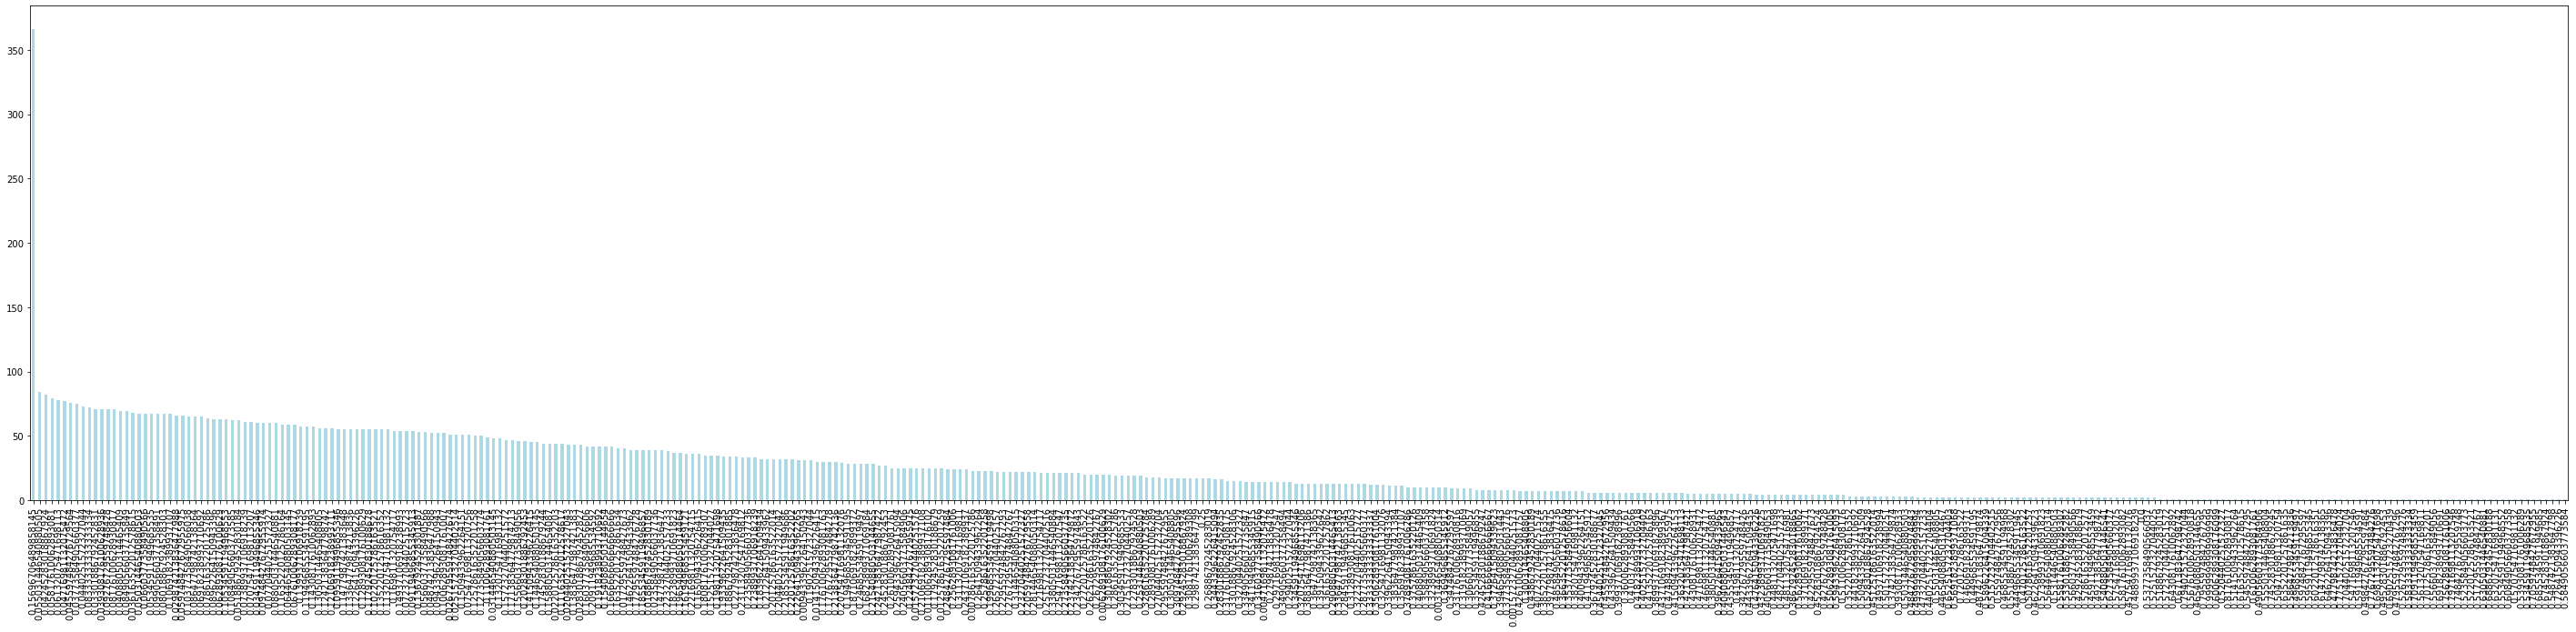

In [27]:
air_quality['C6H6(GT)'].value_counts().plot(kind='bar', color='lightblue', figsize=(50,10))

#### Dropping the features that are having low corelation values and computing the final features for better accuracy.

In [28]:
features=features.drop('Date',axis=1)
features=features.drop('Time',axis=1)
features=features.drop('T',axis=1)
features=features.drop('RH',axis=1)
features=features.drop('AH',axis=1)
features=features.drop('NMHC(GT)',axis=1)
features.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
0,0.211864,0.511845,0.362097,0.111036,0.310885,0.328402,0.513040,0.454822
1,0.161017,0.463029,0.312398,0.068382,0.360864,0.266272,0.453237,0.326238
2,0.177966,0.541996,0.303659,0.087339,0.346463,0.331361,0.451439,0.370547
3,0.177966,0.523331,0.308575,0.115098,0.326133,0.355030,0.464478,0.426586
4,0.127119,0.448672,0.247406,0.087339,0.373994,0.337278,0.422212,0.386186


#### Storing the only features values in 'features' and target values in 'Target'. 

In [29]:
features=features.values
target=target.values

#### Splitting the features and target into random train and test subsets using Sklearn train_test_split()

In [30]:
from sklearn.model_selection import train_test_split

#### Splitting the dataset in the form of 70% for Train and 30% for Test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

## Using Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

### Fitting the linear model.

In [33]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(normalize=True)

### Predicting using the linear model.

In [34]:
print("Predicted values:", regressor.predict(X_test))
y_pred = regressor.predict(X_test)
y_pred.shape


Predicted values: [0.17412604 0.33490266 0.23319505 ... 0.36929059 0.05327388 0.12914108]


(2808,)

### Computing the R^2 score for linear regression.

In [35]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.9753546747650828


### Plotting the graph for linear regression.

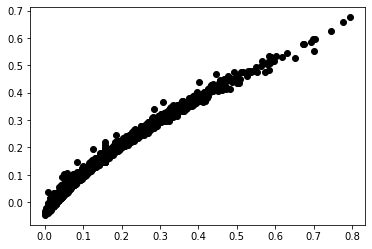

In [36]:
plt.scatter(y_test,y_pred,color='black')
plt.show()

## Using Decision Tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor

### Fitting the decision tree regression model.

In [42]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

### R^2 score on train set for decision tree regression.

In [43]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


### R^2 score on test set for decision tree regression.

In [46]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9999293721558722


# End--------To Practice try it on your own!